# Librarys

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

**Project**

A report by --- speaks to the importans of public libraries for ----. In this project we provide simple statistics and comparisons of how librabries in munusipalities relate to other (----). 
This project is in no way ment to claim a causal conection, as we are simple investigating correlations. 


Report: https://www.roskildebib.dk/sites/roskilde.ddbcms.dk/files/files/news/roskildebib_folkebibliotekets_betydning_for_borgerne_i_danmark_eng_final_0.pdf


Imports and set magics:

In [ ]:
# create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# plot for 2010 in upper left corner
axs[0].scatter(df_mun[df_mun['year'] == '2014']['exp_per_cap'], df_mun[df_mun['year'] == '2014']['loan_per_cap'])
axs[0].set_title('2010')
axs[0].set_ylim(0,10)

# set plot title and labels

axs[1].scatter(df_mun[df_mun['year']== '2018']['exp_per_cap'], df_mun[df_mun['year'] == '2018']['loan_per_cap'])
axs[1].set_ylim(0,10)


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from pandasql import sqldf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

# Importing dataset 1: Libraries by manusipalities 

**Importing data**

Viewing an importing data

In [41]:
#Object for interacting with DST 
Dst = pydst.Dst(lang='en') # setup data loader with the langauge 'english'

In [42]:
#Subjects within DST 
Dst.get_subjects()

,id,desc,active,hasSubjects
0,1,People,True,True
1,2,Labour and income,True,True
2,3,Economy,True,True
3,4,Social conditions,True,True
4,5,Education and research,True,True
5,6,Business,True,True
6,7,Transport,True,True
7,8,Culture and leisure,True,True
8,9,Environment and energy,True,True
9,19,Other,True,True


In [43]:
#List of tables within the subject Culture and leisure with index 7, and id 8
tables = Dst.get_tables(subjects=['7'])
display(tables)

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,BIL5,New registration of motor vehicles,Number,2023-03-10 08:00:00,1992M01,2023M02,True,"[type of vehicle, time]"
1,BIL55,New registrated passenger cars,Number,2023-03-10 08:00:00,2007M01,2023M02,True,"[type of registration, time]"
2,BIL6,"New registrations, sale of second hand vehicle...",Number,2023-03-10 08:00:00,2000M01,2023M02,True,"[type of vehicle, unit, time]"
3,BIL50,New registration of passenger cars,-,2023-03-10 08:00:00,2004M01,2023M02,True,"[ownership, car segment, unit, time]"
4,BIL51,New registrations of passenger cars,Number,2023-03-10 08:00:00,2011M01,2023M02,True,"[ownership, propellant, time]"
...,...,...,...,...,...,...,...,...
160,MOERKE1,Injured in road traffic accidents reported by ...,Number,2021-04-16 08:00:00,2009,2018,True,"[reporter, accident situation, means of transp..."
161,BANE91,Fatalities and injuries in railway traffic acc...,Number,2022-08-31 08:00:00,1993,2021,True,"[railway system, category of person, casualty,..."
162,BANE92,Fatalities and injuries in railway traffic acc...,Number,2022-08-31 08:00:00,2002,2021,True,"[railway system, type of accident, casualty, t..."
163,SKIB95,Accidents at sea involving danish vessels,Number,2022-05-12 08:00:00,2014,2021,True,"[type of accident, type of vessel, scope, time]"


**SLET DET HER UNDER**

In [ ]:
#List of variables from the tabel, BIB1 from subject index =  7, id = 8
#tables[tables.id =='BIB1']

In [44]:
#list of variables (again?)
bib_var = Dst.get_variables(table_id = 'BIB1')
bib_var

# Variables within BNØGLE
#print(bib_var['BNØGLE'].unique())

,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,BNØGLE,key figures,False,False,NaN,"[{'id': '15110', 'text': 'Loan. All materials'..."
2,Tid,time,False,True,NaN,"[{'id': '2009', 'text': '2009'}, {'id': '2010'..."


In [45]:
#Values of the variables  
bib_vars  = Dst.get_variables(table_id = 'BIB1')

for id in [ 'BNØGLE', 'Tid']:
    print(id)
    values = bib_vars.loc[bib_vars.id ==id, ['values']].values[0,0]
    for value in values:
        print(f'id = {value["id"]}, text = {value["text"]}')

BNØGLE
id = 15110, text = Loan. All materials
id = 15120, text = Loan. Books
id = 15130, text = Loan. Audio books
id = 15140, text = Loan. Music recordings
id = 15150, text = Loan. Moving pictures
id = 15160, text = Loan. Multimedia
id = 15170, text = Loan. Other materials
id = 15175, text = Loan. Serial publications
id = 15180, text = Stock. All materials
id = 15190, text = Stock. Books
id = 15200, text = Stock. Audio books
id = 15210, text = Stock. Music recordings
id = 15220, text = Stock. Moving pictures
id = 15230, text = Stock. Multimedia
id = 15240, text = Stock. Other materials
id = 15245, text = Stock. Serial publications (subscribers)
id = 15250, text = Uses of electronic ressources (downloads)
id = 15260, text = Expenditure, materials (DKK 1,000)
Tid
id = 2009, text = 2009
id = 2010, text = 2010
id = 2011, text = 2011
id = 2012, text = 2012
id = 2013, text = 2013
id = 2014, text = 2014
id = 2015, text = 2015
id = 2018, text = 2018
id = 2019, text = 2019
id = 2020, text = 202

**SLET: STOP**  \\\
Skriv anden code der viser de unike coder under BNØGLE

In [46]:
#Eksracting the disired data
#Dictionary of variables of the disired data  (Loan. All materials)
var_pick = {'OMRÅDE': ['*'], 'BNØGLE': ['15110'], 'Tid': ['*']}

#Raw dataset 
bib_api = Dst.get_data(table_id = 'BIB1', variables = var_pick)
bib_api.sort_values(by= ['OMRÅDE', 'TID'])

bib_api.head(10)

,OMRÅDE,BNØGLE,TID,INDHOLD
0,All Denmark,Loan. All materials,2009,48370377
1,Region Nordjylland,Loan. All materials,2009,4772721
2,Region Midtjylland,Loan. All materials,2009,10657591
3,Region Syddanmark,Loan. All materials,2009,10164292
4,Region Hovedstaden,Loan. All materials,2009,15973419
5,Region Sjælland,Loan. All materials,2009,6802354
6,Copenhagen,Loan. All materials,2009,4515774
7,Frederiksberg,Loan. All materials,2009,957136
8,Ballerup,Loan. All materials,2009,536955
9,Brøndby,Loan. All materials,2009,209132


# Importing dataset 2: number of people in the ages (OVERVEJ EN ALDERS BETINGELSE)

In [47]:
#Subjects within DST 
Dst.get_subjects()

,id,desc,active,hasSubjects
0,1,People,True,True
1,2,Labour and income,True,True
2,3,Economy,True,True
3,4,Social conditions,True,True
4,5,Education and research,True,True
5,6,Business,True,True
6,7,Transport,True,True
7,8,Culture and leisure,True,True
8,9,Environment and energy,True,True
9,19,Other,True,True


In [48]:
#List of tables within the subject People        index = 0 id = 1 
tables = Dst.get_tables(subjects=['1'])
display(tables)

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Population at the first day of the quarter,Number,2023-02-10 08:00:00,2008Q1,2023Q1,True,"[region, sex, age, marital status, time]"
1,FOLK1AM,Population at the first day of the month,Number,2023-04-11 08:00:00,2021M10,2023M03,True,"[region, sex, age, time]"
2,BEFOLK1,Population 1. January,Number,2023-03-01 08:00:00,1971,2023,True,"[sex, age, marital status, time]"
3,BEFOLK2,Population 1. January,Number,2023-03-01 08:00:00,1901,2023,True,"[sex, age, time]"
4,FOLK3,Population 1. January,Number,2023-02-10 08:00:00,2008,2023,True,"[day of birth, birth month, year of birth, time]"
...,...,...,...,...,...,...,...,...
354,KM22,Registration and resignation from the national...,Number,2023-03-03 08:00:00,2007Q1,2022Q4,True,"[deanary, age, member of the National Church, ..."
355,KM33,Live births and deaths,Number,2023-03-03 08:00:00,2007Q1,2022Q4,True,"[deanary, movement, time]"
356,KMSTA004,Summary vital statistics,Number,2023-03-03 08:00:00,2015,2022,True,"[deanary, movements, time]"
357,KM4,Religious ceremonies,Number,2023-02-16 08:00:00,2006,2022,True,"[parish, movement, time]"


**SLET**

In [ ]:
#tables = [tables.id == 'BEFOLK1']
#print(tables)

#list of variables (again?)
folk_vars = Dst.get_variables(table_id = 'FOLK1A')
folk_vars

for id in ['OMRÅDE', 'Tid']:
    print(id)
    values = folk_vars.loc[folk_vars.id == id, ['values']].values[0,0]
    for value in values:
        print(f'id= {value["id"]}, text = {value["text"]}')



**SLET: STOP**

In [49]:
#Loading the data 
var_pick = {'OMRÅDE': ['*'], 'Tid':['*']}
bef_api = Dst.get_data(table_id='FOLK1A', variables=var_pick)
bef_api.sort_values(by=['OMRÅDE'], inplace=True)

In [50]:
bef_api.head(10)

,OMRÅDE,TID,KØN,ALDER,CIVILSTAND,INDHOLD
4385,Aabenraa,2008Q3,Total,Total,Total,60427
823,Aabenraa,2020Q2,Total,Total,Total,58694
3767,Aabenraa,2011Q1,Total,Total,Total,59795
812,Aabenraa,2014Q4,Total,Total,Total,58917
1223,Aabenraa,2021Q2,Total,Total,Total,58587
4738,Aabenraa,2013Q3,Total,Total,Total,59197
3226,Aabenraa,2021Q4,Total,Total,Total,58595
808,Aabenraa,2010Q2,Total,Total,Total,59970
767,Aabenraa,2022Q2,Total,Total,Total,58770
5411,Aabenraa,2020Q3,Total,Total,Total,58735


In [51]:
# Keeping only the 1 quarter 
I = bef_api['TID'].str.endswith('Q1')
bef_api_q1 = bef_api[I]


In [52]:
#Renaming the time variable such that it does not include the quarter 
bef_api_q1 = bef_api_q1.rename(columns={'TID': 'tid_temp'})
bef_api_q1['tid_temp'] = bef_api_q1['tid_temp'].str.slice(stop=4)
bef_api_q1 = bef_api_q1.rename(columns={'tid_temp': 'TID'})


bef_api_q1.head(10)

,OMRÅDE,TID,KØN,ALDER,CIVILSTAND,INDHOLD
3767,Aabenraa,2011,Total,Total,Total,59795
5469,Aabenraa,2012,Total,Total,Total,59600
2115,Aabenraa,2015,Total,Total,Total,58904
2092,Aabenraa,2017,Total,Total,Total,59003
1648,Aabenraa,2019,Total,Total,Total,59035
3663,Aabenraa,2023,Total,Total,Total,59002
4748,Aabenraa,2008,Total,Total,Total,60189
6304,Aabenraa,2022,Total,Total,Total,58693
2487,Aabenraa,2018,Total,Total,Total,59089
341,Aabenraa,2014,Total,Total,Total,58970


In [56]:
print(bef_api_q1['ALDER'].unique())

['Total']


# Merging the 2 datasets

In [57]:
#The datasets

print(f'Library dataset contains data from: {np.min(bib_api.TID.unique())} to {np.max(bib_api.TID)}')
print(f'Municipalities in Library data = {len(bib_api.OMRÅDE.unique())}')

print(f'Bef dataset contains data from: {np.min(bef_api_q1.TID.unique())} to {np.max(bef_api_q1.TID)}')
print(f'Municipalities in Library data = {len(bef_api_q1.OMRÅDE.unique())}')

#Differenses in the datasets
diff_mun = [m for m in bef_api_q1.OMRÅDE.unique() if m not in bib_api.OMRÅDE.unique()]
print (f' Munisipalities in bef and not in Lib: {diff_mun}')


Library dataset contains data from: 2009 to 2021
Municipalities in Library data = 103
Bef dataset contains data from: 2008 to 2023
Municipalities in Library data = 105
 Munisipalities in bef and not in Lib: ['Christiansø', 'Fanø']


In [58]:
#print(bib_api.columns)
#print(bef_api_q1.columns)

bib_api['TID'] = bib_api['TID'].astype('object')

print(bib_api.dtypes)
#print(bef_api_q1.dtypes)



OMRÅDE     object
BNØGLE     object
TID        object
INDHOLD     int64
dtype: object


In [59]:
q = """
SELECT bef.OMRÅDE, bef.TID, bef.INDHOLD as n, bib.INDHOLD as n_bib
FROM bef_api_q1 as bef
INNER JOIN bib_api as bib
ON bib.OMRÅDE = bef.OMRÅDE AND bib.TID = bef.TID
"""

# Apply query using pandasql
bef_api_q1_transformed = sqldf(q)

# Print the transformed dataframe
print(f'The merged dataset: \n')
print(bef_api_q1_transformed)

print(f'The merged dataset, dimensions: \n')
print(f'Merged dataset contains data from: {np.min(bef_api_q1_transformed.TID.unique())} to {np.max(bef_api_q1.TID)}')
print(f'Merged dataset contains data form Municipalities = {len(bef_api_q1_transformed.OMRÅDE.unique())}')

The merged dataset: 

        OMRÅDE   TID      n   n_bib
0     Aabenraa  2011  59795  403500
1     Aabenraa  2012  59600  367783
2     Aabenraa  2015  58904  306200
3     Aabenraa  2019  59035  247380
4     Aabenraa  2018  59089  255488
...        ...   ...    ...     ...
1127       Ærø  2013   6527   36475
1128       Ærø  2018   6178   28687
1129       Ærø  2012   6636   43328
1130       Ærø  2011   6663   46170
1131       Ærø  2021   5960   20285

[1132 rows x 4 columns]
The merged dataset, dimensions: 

Merged dataset contains data from: 2009 to 2023
Merged dataset contains data form Municipalities = 103


**SLET**

In [31]:
q = """
SELECT bef.OMRÅDE as municipality, bef.TID as year, bef.INDHOLD as n, bib.INDHOLD as n_bib
FROM bef_api_q1 as bef
INNER JOIN bib_api as bib
ON bib.OMRÅDE = bef.OMRÅDE AND bib.TID = bef.TID
"""

# Apply query using pandasql
bef_api_q1_transformed = sqldf(q)


# Print the transformed dataframe
print(f'The merged dataset: \n')
print(bef_api_q1_transformed)

print(f'The merged dataset, dimensions: \n')
print(f'Merged dataset contains data from: {np.min(bef_api_q1_transformed.year.unique())} to {np.max(bef_api_q1.TID)}')
print(f'Merged dataset contains data form Municipalities = {len(bef_api_q1_transformed.municipality.unique())}')

The merged dataset: 

     municipality  year      n   n_bib
0        Aabenraa  2013  59208  345003
1        Aabenraa  2015  58904  306200
2        Aabenraa  2011  59795  403500
3        Aabenraa  2014  58970  338432
4        Aabenraa  2020  58761  180782
...           ...   ...    ...     ...
1127          Ærø  2012   6636   43328
1128          Ærø  2020   5964   21796
1129          Ærø  2013   6527   36475
1130          Ærø  2021   5960   20285
1131          Ærø  2010   6679   47241

[1132 rows x 4 columns]
The merged dataset, dimensions: 

Merged dataset contains data from: 2009 to 2023
Merged dataset contains data form Municipalities = 103


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Working with the data** :

In [60]:
df = bef_api_q1_transformed

In [63]:
# Year variable is an object 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   OMRÅDE  1132 non-null   object
 1   TID     1132 non-null   object
 2   n       1132 non-null   int64 
 3   n_bib   1132 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 35.5+ KB


In [64]:
df.municipality = df.municipality.astype('string')
df.year = df.year.astype('Int64')

AttributeError: 'DataFrame' object has no attribute 'municipality'

In [65]:
df['Loan per capita'] = df['n_bib'] / df['n']

In [66]:
print(df['OMRÅDE'].unique())

['Aabenraa' 'Aalborg' 'Aarhus' 'Albertslund' 'All Denmark' 'Allerød'
 'Assens' 'Ballerup' 'Billund' 'Bornholm' 'Brøndby' 'Brønderslev'
 'Copenhagen' 'Dragør' 'Egedal' 'Esbjerg' 'Faaborg-Midtfyn' 'Favrskov'
 'Faxe' 'Fredensborg' 'Fredericia' 'Frederiksberg' 'Frederikshavn'
 'Frederikssund' 'Furesø' 'Gentofte' 'Gladsaxe' 'Glostrup' 'Greve'
 'Gribskov' 'Guldborgsund' 'Haderslev' 'Halsnæs' 'Hedensted' 'Helsingør'
 'Herlev' 'Herning' 'Hillerød' 'Hjørring' 'Holbæk' 'Holstebro' 'Horsens'
 'Hvidovre' 'Høje-Taastrup' 'Hørsholm' 'Ikast-Brande' 'Ishøj' 'Jammerbugt'
 'Kalundborg' 'Kerteminde' 'Kolding' 'Køge' 'Langeland' 'Lejre' 'Lemvig'
 'Lolland' 'Lyngby-Taarbæk' 'Læsø' 'Mariagerfjord' 'Middelfart' 'Morsø'
 'Norddjurs' 'Nordfyns' 'Nyborg' 'Næstved' 'Odder' 'Odense' 'Odsherred'
 'Randers' 'Rebild' 'Region Hovedstaden' 'Region Midtjylland'
 'Region Nordjylland' 'Region Sjælland' 'Region Syddanmark'
 'Ringkøbing-Skjern' 'Ringsted' 'Roskilde' 'Rudersdal' 'Rødovre' 'Samsø'
 'Silkeborg' 'Skanderborg' 

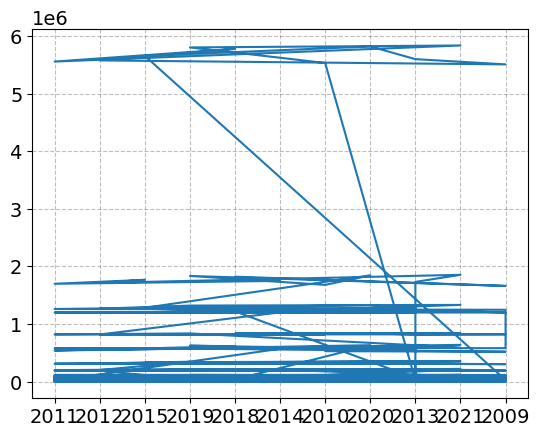

In [70]:
Mun = ['Aalborg', 'Gentofte', 'Silkeborg' ]

    # a. create the figure
fig = plt.figure()

    # b. plot
ax = fig.add_subplot(1,1,1)


for i in Mun:
    I = df['OMRÅDE'] == i

    loan_per = df[I]['n']
    year_plot = df[I]['TID']
    ax.plot(year_plot, loan_per, label = i)




In [ ]:


municipalities = ['Copenhagen','Roskilde','Lejre']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for m in municipalities:
    empl_.xs(m).plot(x='year',y='e_demean',ax=ax,label=m)

ax.legend(frameon=True)
ax.set_ylabel('difference to mean')

In [ ]:


# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

for i in Mun:
    I = df['OMRÅDE'] == i

    loan_per = df[I]['Loan per capita']
    year_plot = df[I]['year']

    ax.plot( loan_per, year_plot, label = i)


In [ ]:
# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(year_plot, loan_per)

In [ ]:
# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(df['n_bib'].loc['Aabenraa'], df['year'].loc['Aabenraa'])

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.